# PURPOSE

In [65]:
'''
spectral analysis of numeric data via pca
'''
None

# IMPORTS

In [1]:
%run notebook_setup.ipynb

In [2]:
%run wish_dataset_2_class_def.ipynb

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# GET DATASET

In [3]:
d=Dataset()

# PCA

In [10]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline

In [8]:
df_num = d.df.select_dtypes(include=['int64','float64'])
df_num

,price,retail_price,units_sold,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,merchant_rating_count,merchant_rating
0,16.00,14,100,3.76,54,26.0,8.0,10.0,1.0,9.0,568,4.128521
1,8.00,22,20000,3.45,6135,2269.0,1027.0,1118.0,644.0,1077.0,17752,3.899673
2,8.00,43,100,3.57,14,5.0,4.0,2.0,0.0,3.0,295,3.989831
3,8.00,8,5000,4.03,579,295.0,119.0,87.0,42.0,36.0,23832,4.020435
4,2.72,3,100,3.10,20,6.0,4.0,2.0,2.0,6.0,14482,4.001588
...,...,...,...,...,...,...,...,...,...,...,...,...
1565,3.00,8,100,3.79,57,25.0,10.0,13.0,3.0,6.0,4080,3.987990
1567,8.00,7,20000,4.25,3127,1919.0,580.0,304.0,128.0,196.0,16803,4.155032
1568,6.00,9,10000,4.08,1367,722.0,293.0,185.0,77.0,90.0,5316,4.224605
1570,5.00,19,100,3.71,59,24.0,15.0,8.0,3.0,9.0,210,3.961905


### full decomposition

<AxesSubplot:>

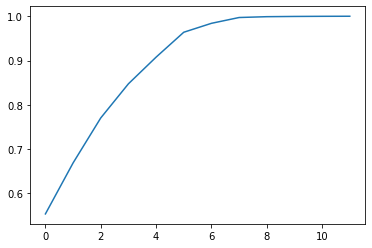

In [11]:
# pipeline
pl = make_pipeline(
    SimpleImputer(missing_values=np.nan, strategy='mean'), # PCA can't have nans
    StandardScaler(), # apply standard scaler first, PCA super sensitive to scaling
    PCA(),
)
pl.fit(df_num)

pca=pl.named_steps['pca']

pd.Series(pca.explained_variance_ratio_).cumsum().plot() # looks like 5/6 principal components already does the job of explaining the variance within the selected dataset

### try sticking in a MinMaxScaler as well to tighten up data

<AxesSubplot:>

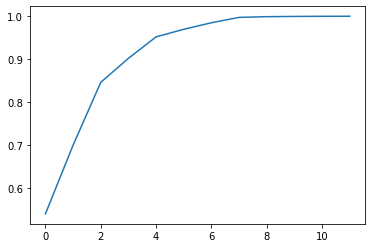

In [17]:
# pipeline
pl = make_pipeline(
    SimpleImputer(missing_values=np.nan, strategy='mean'), # PCA can't have nans
    StandardScaler(), # apply standard scaler first, PCA super sensitive to scaling
    MinMaxScaler(feature_range=(-1,1)), # consider apply minmax scaler on 1 sd of the data as well smooth outliers
    PCA(),
)
pl.fit(df_num)

pca=pl.named_steps['pca']

pd.Series(pca.explained_variance_ratio_).cumsum().plot() # looks like 5/6 principal components already does the job of explaining the variance within the selected dataset

### look at 2d projection

<AxesSubplot:xlabel='ev1', ylabel='ev2'>

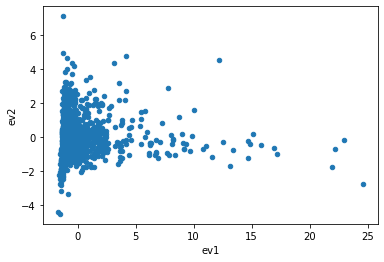

In [19]:
# pipeline
pl = make_pipeline(
    SimpleImputer(missing_values=np.nan, strategy='mean'), # PCA can't have nans
    StandardScaler(), # apply standard scaler first, PCA super sensitive to scaling
    #MinMaxScaler(feature_range=(-1,1)), # consider apply minmax scaler on 1 sd of the data as well smooth outliers
    PCA(n_components=2),
)
reduced = pl.fit_transform(df_num)

# plot
pd.DataFrame(reduced,columns=['ev1','ev2']).plot(kind='scatter',x='ev1',y='ev2')

### 3d plot

In [60]:
from mpl_toolkits import mplot3d

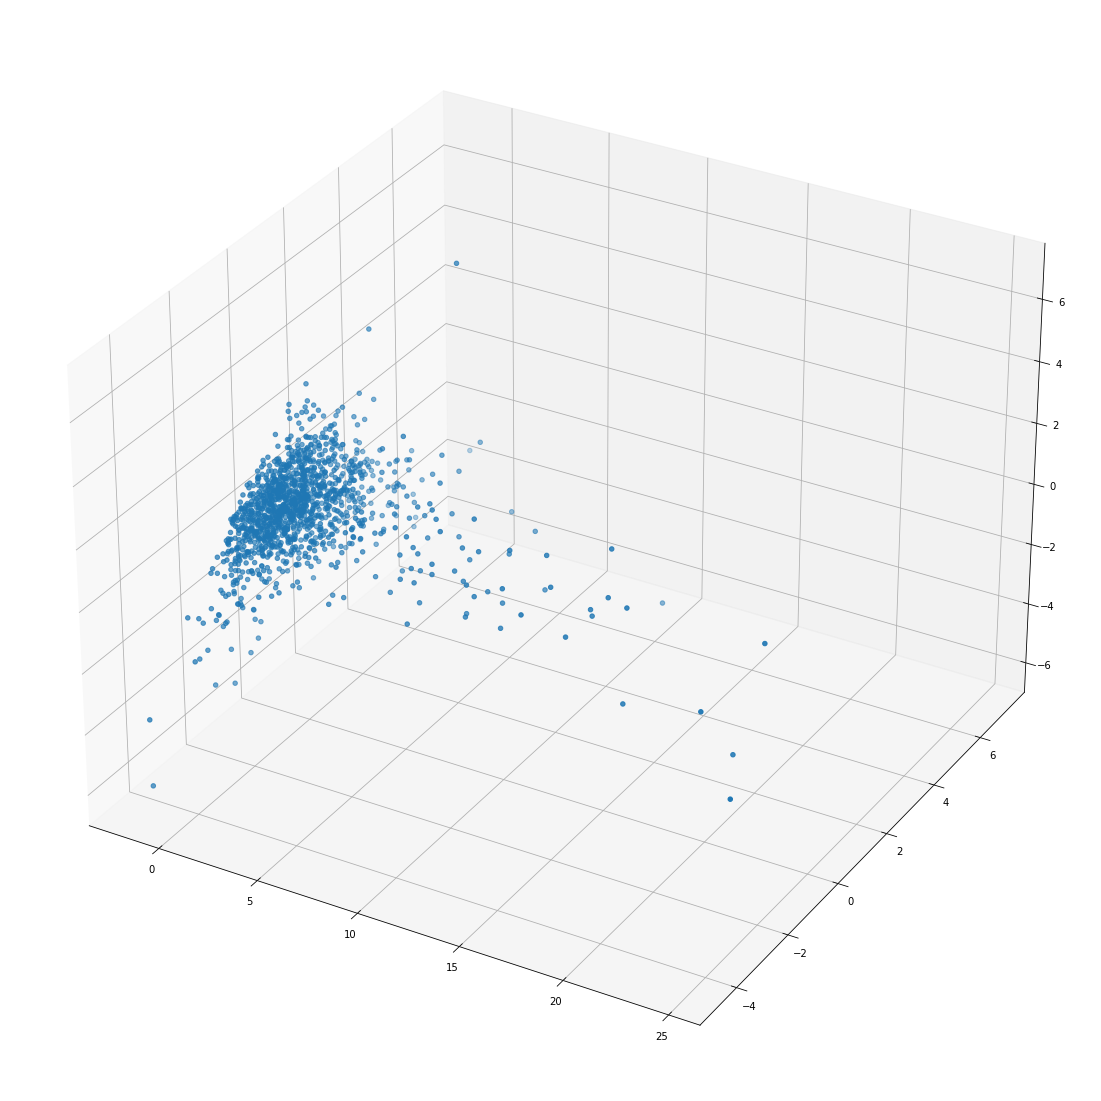

In [20]:
# pipeline
pl = make_pipeline(
    SimpleImputer(missing_values=np.nan, strategy='mean'), # PCA can't have nans
    StandardScaler(), # apply standard scaler first, PCA super sensitive to scaling
    #MinMaxScaler(feature_range=(-1,1)), # consider apply minmax scaler on 1 sd of the data as well smooth outliers
    PCA(n_components=3),
)
reduced = pl.fit_transform(df_num)

# plot
fig = plt.figure(figsize=(20,20)) 
ax = plt.axes(projection='3d')
ax.scatter3D(reduced[:,0],reduced[:,1],reduced[:,2], 'gray') 

# plot to see if anything nice structures in 3d

### extract partial decomposition

In [21]:
# pipeline
pl = make_pipeline(
    SimpleImputer(missing_values=np.nan, strategy='mean'), # PCA can't have nans
    StandardScaler(), # apply standard scaler first, PCA super sensitive to scaling
    #MinMaxScaler(feature_range=(-1,1)), # consider apply minmax scaler on 1 sd of the data as well smooth outliers
    PCA(n_components=5),
)
reduced = pl.fit_transform(df_num)

pd.DataFrame(reduced) # look at partial decomp

,0,1,2,3,4
0,-1.211066,1.011593,-0.574731,-0.221933,-0.333890
1,6.938827,-1.266804,-1.454389,-0.549133,-0.236781
2,-1.257032,-0.024211,-0.642799,0.096949,-0.285215
3,-0.475956,-0.212758,0.465265,-0.193260,0.313077
4,-1.256041,-1.856281,0.043165,0.534058,-0.919691
...,...,...,...,...,...
1336,-1.210487,-1.168664,0.654432,-0.088878,-0.053082
1337,2.302636,0.156458,1.002019,-0.731225,0.097441
1338,0.487386,-0.044894,1.187390,-0.422946,-0.465878
1339,-1.219782,-0.820272,0.109785,-0.071692,-0.046243
